In [1]:
# General Overview

# How many restaurants are in the dataset?

# How many cities are included?

# What are the types of restaurants (Cafe, Casual Dining, Quick Bites, etc.)?

# How many restaurants provide online delivery?

# 2️⃣ Ratings Analysis

# What is the distribution of ratings? (Histogram / KDE)

# Which are the top 10 highest-rated restaurants?

# Which city has the highest average rating?  


# How are ratings related to restaurant type?   doubt

# Are there restaurants with zero ratings?

# 3️⃣ Cuisine Analysis

# What are the most common cuisines? 

# Which cuisines have the highest average ratings?

# Which cuisines are most expensive on average?

# How many cuisines are offered in each city?

# 4️⃣ Cost Analysis

# What is the distribution of average cost for two people?

# Which city has the most expensive restaurants?

# Does a higher price mean higher rating? (Scatter plot)

# Which cuisine types are cheaper or more expensive?

# 5️⃣ Votes / Popularity Analysis

# Which restaurants received the most votes?

# Which city has restaurants with the most votes?

# Is there a relationship between votes and rating?

# 6️⃣ Online Delivery Analysis

# How many restaurants offer online delivery vs not? (Count plot)

# Which cities have most restaurants with online delivery?

# Which cuisines are mostly offered for online delivery?

# 7️⃣ Insights / Summary

# Summarize top-rated cities and restaurants

# Summarize popular cuisines

# Find price vs rating trends

# Highlight online delivery patterns

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import statistics as sts

In [7]:
from scipy.stats import kurtosis, norm

In [8]:
df  = pd.read_csv(r"C:\Users\Desktop\Downloads\archive\zomato.csv", encoding='latin1')

In [9]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [14]:
q=df['Average Cost for two']
print(q)

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64


In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [41]:
df['Average Cost for two'].describe()

count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.shape

(9551, 21)

In [11]:
df.isna().sum() #cuisine have 9 null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df['Restaurant Name'].duplicated().sum()

2105

In [13]:
#To calculate how many resturants are there 
df['Restaurant Name'].nunique()

7446

In [14]:
#to calculate how many cities are there
df['City'].nunique()

141

In [15]:
for i in df['Restaurant Name'].unique():
    print(i)

Le Petit Souffle
Izakaya Kikufuji
Heat - Edsa Shangri-La
Ooma
Sambo Kojin
Din Tai Fung
Buffet 101
Vikings
Spiral - Sofitel Philippine Plaza Manila
Locavore
Silantro Fil-Mex
Mad Mark's Creamery & Good Eats
Guevarra's
Sodam Korean Restaurant
Cafe Arabelle
Nonna's Pasta & Pizzeria
Balay Dako
Hobing Korean Dessert Cafe
Wildflour Cafe + Bakery
NIU by Vikings
The Food Hall by Todd English
Chez Michou
Cafí© Daniel Briand
Casa do Biscoito Mineiro
Maori
Pizza íæ Bessa
Sushi Loko
Beirute
New Koto
Sandubas Cafí©
Villa Tevere
Rovereto
Buena Carne
Taco Pep
Coco Bambu
Taypíç
Outback Steakhouse
Manzuíç
Gero
Brazilian American Burgers
Pesqueiro Eco Gourmet
Confeitaria Colombo
Bibi
Cervantes
Amir
TT Burger
Braseiro da Gíçvea
Balada Mix
Garota de Ipanema
Zazíç BistríÇ Tropical
Filí© de Ouro
D.O.C Ristorante
Sushi Leblon
Talho Capixaba
Leme Light
Shirley
Quiosque Chopp Brahma
Aprazí_vel
Aconchego Carioca
Cantina Famiglia Mancini
Templo da Carne - Marcos Bassi
Gopala Hari
Jiquitaia
Skye - Hotel Unique
Les

In [16]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [17]:
(df['Has Online delivery']=='Yes').sum()


2451

In [18]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


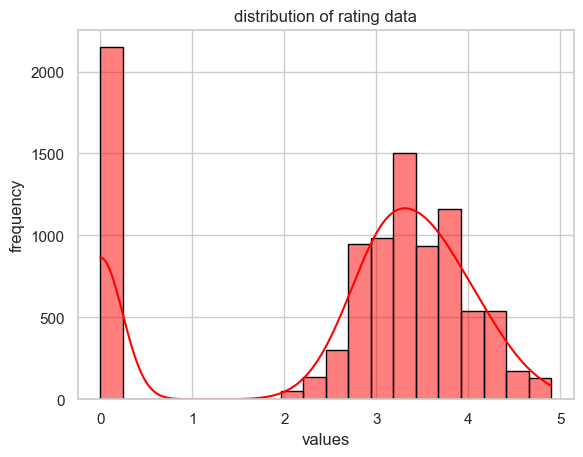

In [19]:
sns.set(style='whitegrid')
sns.histplot(df['Aggregate rating'] , kde= True , bins= 20 , color = 'red' , edgecolor='black')
plt.title("distribution of rating data")
plt.xlabel('values')
plt.ylabel('frequency')
plt.show()


In [20]:
(df['Aggregate rating']==0).sum()

2148

In [21]:
top10 = df.sort_values(by='Aggregate rating', ascending=False)['Restaurant Name'].head(1)
print(top10)

      

1381    Caterspoint
Name: Restaurant Name, dtype: object


In [22]:
#if we want only restaurant Name then


In [23]:
top10 = df.sort_values(by='Aggregate rating', ascending=False).head(10).reset_index()
print(top10['Restaurant Name'])



0                      Caterspoint
1          AB's Absolute Barbecues
2    McGuire's Irish Pub & Brewery
3                            Miann
4                            Milse
5                 Talaga Sampireun
6                Garota de Ipanema
7                 Talaga Sampireun
8               Braseiro da Gíçvea
9                Mama's Fish House
Name: Restaurant Name, dtype: object


In [24]:
#city which have highest average  rating
df['City'].nunique()

141

In [25]:
df['Aggregate rating'].mean()

2.66637001361114

In [26]:
# How are ratings related to restaurant type?
df.corr(numeric_only=True)


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


In [27]:
# What are the most common cuisines?
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [28]:
#as we have previously checked there were some null values in the cuisines 
df.dropna(subset=['Cuisines'], inplace=True)

In [29]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [30]:
city_avg_rating = (
    df.groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

print(city_avg_rating.head(10))


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64


means inner city has the highest average rating

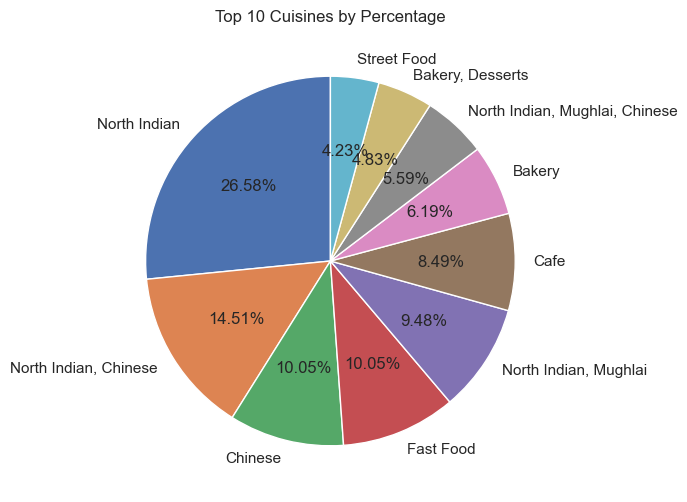

In [31]:
plt.figure(figsize=(6,6))

# Get top 10 cuisines
gb = df['Cuisines'].value_counts().head(10)

# Plot pie chart
plt.pie(gb, labels=gb.index, autopct='%1.2f%%', startangle=90)
plt.title("Top 10 Cuisines by Percentage", fontsize=12)
plt.show()


northindian cuisines is most common 

In [32]:
# Which cuisines have the highest average ratings?
cus_highrating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(1)
print(cus_highrating)


Cuisines
Italian, Deli    4.9
Name: Aggregate rating, dtype: float64


In [33]:
# Which cuisines are mostly offered for online delivery?


In [34]:
# Which cities have most restaurants with online delivery?
a = df.loc[df['Has Online delivery']=='Yes',['Restaurant Name','City']  ]
a

,Restaurant Name,City
565,Famous Dave's Barbecue,Abu Dhabi
566,Pizza Di Rocco,Abu Dhabi
571,Cho Gao - Crowne Plaza Abu Dhabi,Abu Dhabi
572,Gazebo,Abu Dhabi
573,Sangeetha Vegetarian Restaurant,Abu Dhabi
...,...,...
9166,Chili's,Pune
9168,Blue Water,Pune
9170,Tales & Spirits,Pune
9171,18 Degrees Resto Lounge,Pune


In [35]:
a.groupby('City').size().sort_values(ascending=False).head(1)

City
New Delhi    1489
dtype: int64

In [36]:
# Which cuisines are mostly offered for online delivery?
b=df.loc[df['Has Online delivery']=='Yes', ['Cuisines']]

In [37]:
b.groupby('Cuisines').size().sort_values(ascending=False).head(1)

Cuisines
North Indian, Chinese    187
dtype: int64

In [38]:
df[df['Has Online delivery']=='Yes']['Cuisines'].value_counts().idxmax()


'North Indian, Chinese'

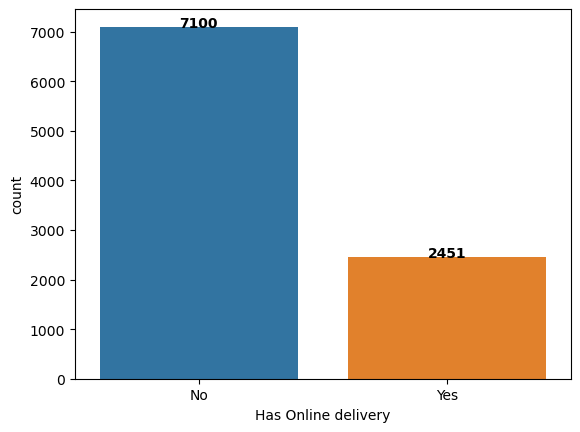

In [10]:
#Display the values on th bars
import seaborn as sns
import matplotlib.pyplot as plt
a=sns.countplot(x='Has Online delivery', data=df )
values=df['Has Online delivery'].value_counts().values
for i,value in enumerate(values):
  plt.text(i,value+2 , str(value),ha='center', fontweight='bold', color='black')
plt.show()
  

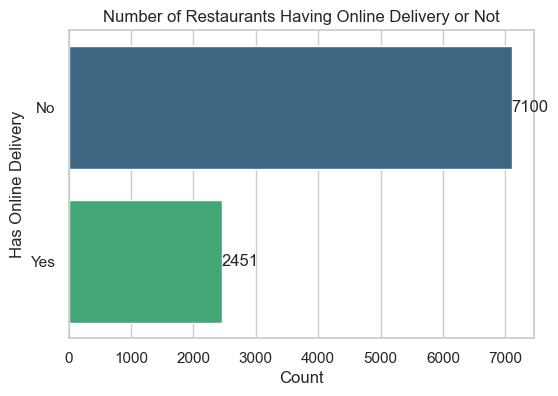

In [40]:
# a=sns.countplot(y='Has Online delivery', data = df , hue='Restaurant Name')
# a.bar_label(a.containers[0])
# a.bar_label(a.containers[1])
# plt.title('showing how many restaurant having online delvery or not')
# plt.show()

df = pd.read_csv(r"C:\Users\Desktop\Downloads\archive\zomato.csv", encoding='latin1')

plt.figure(figsize=(6,4))
a = sns.countplot(y='Has Online delivery', data=df, palette='viridis')

# Add labels on bars
for container in a.containers:
    a.bar_label(container)

plt.title('Number of Restaurants Having Online Delivery or Not', fontsize=12)
plt.xlabel('Count')
plt.ylabel('Has Online Delivery')
plt.show()
